Multiple_Myeloma_data_challenge
============================
Technical test for Data Scientist (DS) position in the Computational Biology team

Katarzyna Wreczycka 15.10.2022




Clinical context
-------------------
Multiple Myeloma (MM) is a type of bone marrow cancer. Treatment for MM involves
combinations of drugs over multiple cycles. There is huge heterogeneity in treatment
response with some individuals being non-responders and some patients remaining well for
some time before a relapse. A better characterization of patients who relapse early can
influence the treatment options and combinations.

In this test, we propose to develop a model for predicting the risk of dying or relapsing of
newly diagnosed multiple myeloma patients from baseline clinical and expression data.


Data
--------------------------
The data for this test are extracted from an old Synapse Dream Challenge
(https://www.synapse.org/#!Synapse:syn6187098/wiki/401884) .
It consists of clinical data, gene expression data and follow-up for newly diagnosed Multiple
Myeloma patients extracted from the MMRF CoMMpass IA9 study. In the data, newly
diagnosed MM patients are classified as High Risk (HR) when they relapse or die before 18
months.
To access the data, you first need to create an account and download the following files:
- Expression data:
MMRF_CoMMpass_IA9_E74GTF_Salmon_entrezID_TPM_hg19.csv
(https://www.synapse.org/#!Synapse:syn10573789)
[notice that the first column gives Entrez IDs for genes]
- Clinical data and labels:
sc3_Training_ClinAnnotations.csv
(https://www.synapse.org/#!Synapse:syn9926878)
- Explanation of the clinical and label annotations:
Harmonized_Clinical_Dictionary
(https://www.synapse.org/#!Synapse:syn9744732)



Goal
--------------------------------------
The purpose of this technical test is to develop a model for predicting the risk of fast dying or
relapsing of newly diagnosed multiple myeloma patients (using the High Risk label
HR_FLAG).The evaluation will mostly rely on the way you approach the problem: pre-analysis,
preprocessing strategy, choice of modelization and coding skills.
The code should be developed so that the model can be applied to an external validation
dataset. You will send your code (Notebook or script) along with a small report to interpret
the model and put it in MM context (the use of the literature is clearly welcome).
Your model can be developed in Python or R with a small README to explain how to apply
it to external data.

You can use external knowledge/data to develop the model. Please add all the requirements
for libraries that should be installed to make it run.

If not used to survival analysis, the candidate can consider a simplified version in which it
can assumed that no censored patients will be present in the external validation dataset.

(Obvious) suggestion: OS and PFS related variables are also labels and not features:
HR_FLAG is defined as OS or PFS < 18 months (taking into account censoring).




Results
-----------------------


In [25]:
# load libraries
#library(tidyverse)
library(data.table)
library(org.Hs.eg.db)


Attaching package: ‘data.table’


The following object is masked from ‘package:SummarizedExperiment’:

    shift


The following object is masked from ‘package:GenomicRanges’:

    shift


The following object is masked from ‘package:IRanges’:

    shift


The following objects are masked from ‘package:S4Vectors’:

    first, second


Loading required package: AnnotationDbi





In [ ]:
# load data
clinical_data = read.csv("./Harmonized_Clinical_Dictionary.csv", sep=",", header=TRUE,fill = TRUE, stringsAsFactors = FALSE)
expression_data = read.csv("./MMRF_CoMMpass_IA9_E74GTF_Salmon_entrezID_TPM_hg19.csv", sep=",", header=TRUE,stringsAsFactors = FALSE,row.names=1)
annot_data = read.csv("./sc3_Training_ClinAnnotations.csv", sep=",", header=TRUE, stringsAsFactors = FALSE)

In [5]:
# Convert the row names to entrez ids
#library("AnnotationDbi")
#library("org.Hs.eg.db")
#geneSymbols <- mapIds(org.Hs.eg.db, keys=rownames(expression_data), 
#                      column="SYMBOL", keytype="ENTREZID", 
#                      multiVals="first")
#head(geneSymbols)



[1] "1"  "2"  "3"  "9"  "10" "13"


'select()' returned 1:1 mapping between keys and columns



1       2       3       9      10      13 
 "A1BG"   "A2M" "A2MP1"  "NAT1"  "NAT2" "AADAC"

In [ ]:

print("-------------------------------------clinical data")
dim(clinical_data)
print(head(clinical_data))

print("-------------------------------------expression data")
# RNA-seq files are processed similarly to the MMRF's TGEN JetStream pipeline for CoMMpass IA9 using salmon to quantify genes and transcripts with Hg19 as the reference.
# notice that the first column gives Entrez IDs for genes
print(dim(expression_data)) #24128   735
print(head(expression_data))
genes.names = mapIds(org.Hs.eg.db, rownames(expression_data), 'SYMBOL', 'ENTREZID') = 


print("-------------------------------------annot data")
# Age, Gender and ISS (International Staging System stage) are available for most patients.
# Each training set has the patient age, sex, ISS stage, overall survival, 
# survival time, progression event indicator and time to progression.
print(dim(annot_data)) #583  44
print(head(annot_data))

table(annot_data$Study)


[1] "-------------------------------------clinical data"


[1] 73 11

              names category      type         controlled_values
1           Patient       id Character                          
2             Study       id    Factor                          
3       Sample_Name       id Character                          
4 Controlled_Sample       id   Numeric           0="No"; 1="Yes"
5        Visit_Name       id Character                          
6  Sample_Type_Flag       id   Numeric 0="Normal"; 1="NotNormal"
                                                            description
1                            Normalized patient identification number. 
2                                  Study cohort this patient belongs to
3                                                     Sample identifier
4 Should this sample/ patient be maintained under controlled conditions
5       baseline, relapse, etc. Currently not curated onto an ontology.
6                            Classify this sample as normal/not normal.
                                         

In [ ]:
table(annot_data$Study)
table(annot_data$PatientType)
table(annot_data$D_Gender)
summary(annot_data$D_Age)


Data preprocessing
---------------------

Clustering
---------------------





[1] 1000  734


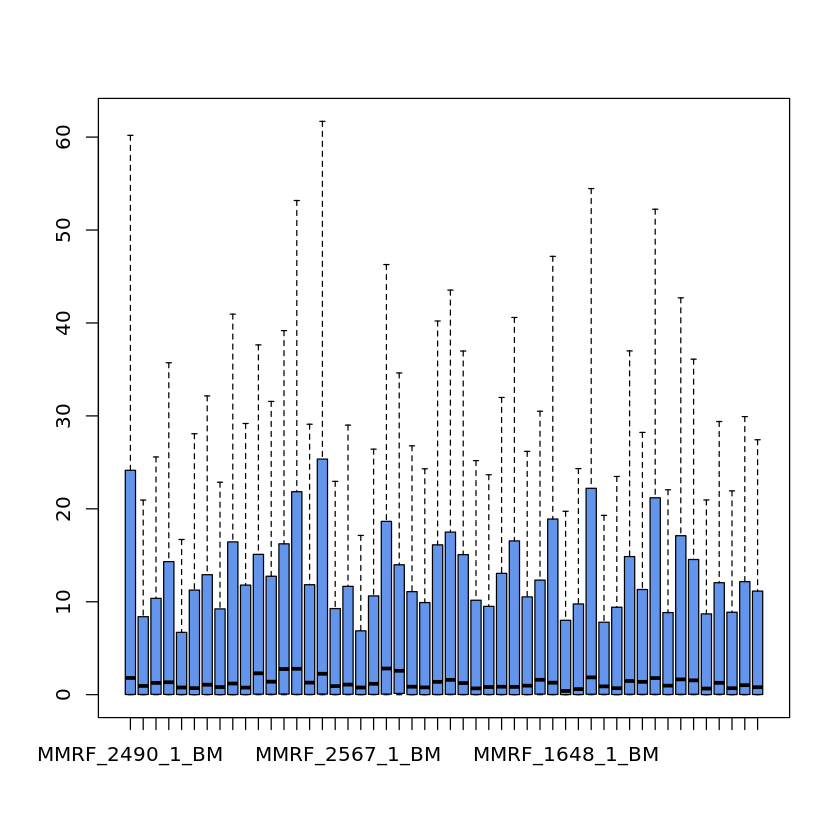

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: MatrixGe

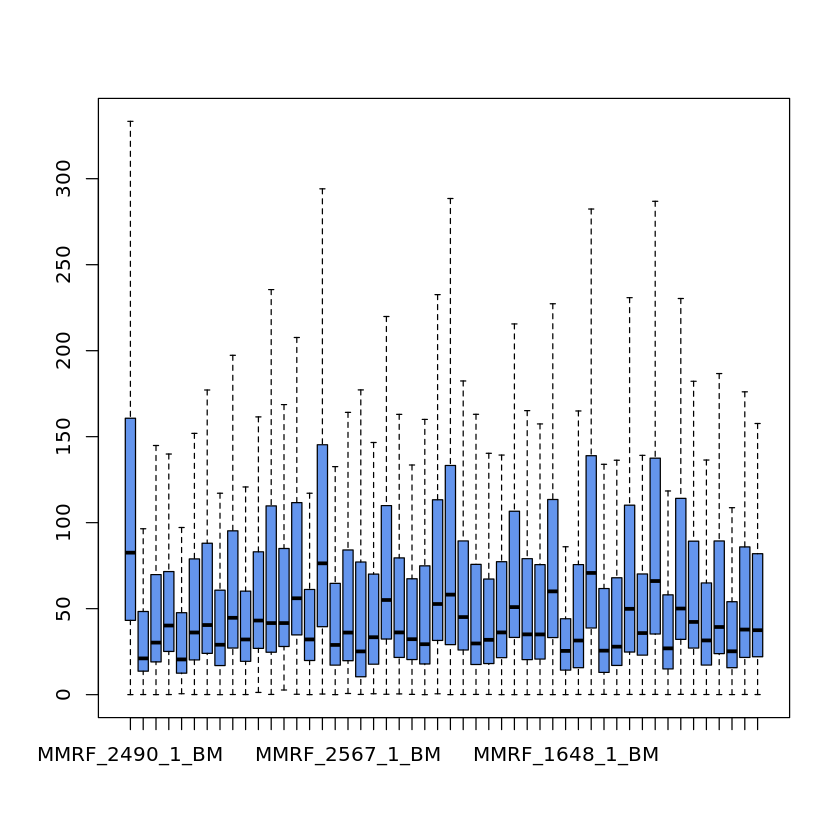

In [8]:
# data normalization and transformation
library(DESeq2)

#print(dim(expression_data))
edata = expression_data[1:1000,]
#edata = expression_data[rowMeans(expression_data)>20,]
#edata = log2(edata+1)
print(dim(edata))
#expression_data<-NULL


boxplot(edata[,1:50],outline=FALSE,col="cornflowerblue")

edata1 = edata[rowMeans(edata)>20,]
boxplot(edata1[,1:50],outline=FALSE,col="cornflowerblue")


In [24]:
#print(head(annot_data))
print(length(annot_data$Patient))

print(dim(edata1))


#summary( edata1$PatientType )

#dim(annot_data)
#dim(edata1)

dds <- DESeqDataSetFromMatrix(countData = edata1,
                              colData = data.frame(
                                              D_Age=annot_data$D_Age,
                                              D_Gender=annot_data$D_Gender,
                                              HR_FLAG=annot_data$HR_FLAG
                                                ))
#print(head(dds))




[1] 583
[1] 221 734


ERROR: Error in DESeqDataSetFromMatrix(countData = edata1, colData = data.frame(D_Age = annot_data$D_Age, : ncol(countData) == nrow(colData) is not TRUE


in the publication (https://www.nature.com/articles/s41375-020-0742-z) they say something about 
https://blog.datadive.net/selecting-good-features-part-i-univariate-selection/
"The top-performing model implemented a wisdom of the crowd approach, utilizing clinical features and published myeloma signatures that summarize the expression of gene sets. The second-place “Stanford University Go” (SUGO) model instead included individual genes as features, utilizing a univariate-based feature selection approach to identify genes to include in their model"

(REE-laps) The return of a disease or the signs and symptoms of a disease after a period of improvement

Goal
------------

**find important CpGs**
- find CpGs that discriminatory between subtypes of neuroblastoma. 
- Use elasticNet, randomForests and XGBoost, get feature importance metrics for all of them. Use the common ones, you can assign p-values to importance metrics using resampling statistics. That is what Inga is doing. Easier way is to calculate a common ranking from individual ranking values. For example, you can take the average rank for feature importance from 3 ML methods, rank them by average rank and take the top X amount of features. There you have to decide what is X.  

**annotate CpGs**
- annotate the CpGs  for the genomic location (promoter, exon, intron, enhancer etc)
- associate CpGs to genes: if they overlap genes or or promoters associate them to those genes. If they are intergenic, associate them to the nearest TSS. 
- run enrichR on those genes
- run GREAT on CpGs themselves 

In [ ]:
#---- set your palette
tropical = c("darkorange", "dodgerblue", "hotpink", "limegreen" ,"yellow")
palette(tropical)

#---- global options
par(pch=19) # the circles on a plot are filled in, rather than empty


#---- load packages
#install.packages("gplots")
#install.packages("Biobase")
#devtools::install_github('alyssafrazee/RSkittleBrewer')
#BiocManager::install("org.Hs.eg.db")
#BiocManager::install("AnnotationDbi")
library(gplots)
library(devtools)
library(Biobase)
library(RSkittleBrewer)
library(org.Hs.eg.db)
library(AnnotationDbi)


edata = expression_data[rowMeans(expression_data) > 100,]
# to be ona scale thats easier to work with
edata = log2(edata + 1)
# if we dont center the data, if we dont remove rowmeans of the center, the column means of data
# then the first singual value will always be the mean level
# since that will always explain the most variation in genomics experiment
# we want to see variation between sample or between genes
edata_centered = edata - rowMeans(edata) 
svd1 = svd(edata_centered)
names(svd1)

par(pch=19)
# plot singular values
plot(svd1$d, ylab="Singular value", col=2)
plot(svd1$d^2 / sum(svd1$d^2), ylab="Percent variance explained", col=2)

# plot fist two eigengenes
par(mfrow = c(1,2))
plot(svd1$v[,1], col=2, ylab="1st PC")
plot(svd1$v[,2], col=2, ylab="2nd PC")





In [ ]:
# try KNN, Support Vector Machines and Ensemble Methods like Random Forests or Gradient Boosting

In [5]:
library(survival)
?lung

head(lung$time)
head(lung$status)
s <- Surv(lung$time, lung$status)
#class(s)
head(lung)


survfit(s~1)
survfit(Surv(time, status)~1, data=lung)
sfit <- survfit(Surv(time, status)~1, data=lung)
sfit


summary(sfit)


[1]  306  455 1010  210  883 1022

[1] 2 2 1 2 2 1

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,306,2,74,1,1,90,100,1175,NA
2,3,455,2,68,1,0,90,90,1225,15
3,3,1010,1,56,1,0,90,90,NA,15
4,5,210,2,57,1,1,90,60,1150,11
5,1,883,2,60,1,0,100,90,NA,0
6,12,1022,1,74,1,1,50,80,513,0


Call: survfit(formula = s ~ 1)

       n events median 0.95LCL 0.95UCL
[1,] 228    165    310     285     363

Call: survfit(formula = Surv(time, status) ~ 1, data = lung)

       n events median 0.95LCL 0.95UCL
[1,] 228    165    310     285     363

Call: survfit(formula = Surv(time, status) ~ 1, data = lung)

       n events median 0.95LCL 0.95UCL
[1,] 228    165    310     285     363

Call: survfit(formula = Surv(time, status) ~ 1, data = lung)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    5    228       1   0.9956 0.00438       0.9871        1.000
   11    227       3   0.9825 0.00869       0.9656        1.000
   12    224       1   0.9781 0.00970       0.9592        0.997
   13    223       2   0.9693 0.01142       0.9472        0.992
   15    221       1   0.9649 0.01219       0.9413        0.989
   26    220       1   0.9605 0.01290       0.9356        0.986
   30    219       1   0.9561 0.01356       0.9299        0.983
   31    218       1   0.9518 0.01419       0.9243        0.980
   53    217       2   0.9430 0.01536       0.9134        0.974
   54    215       1   0.9386 0.01590       0.9079        0.970
   59    214       1   0.9342 0.01642       0.9026        0.967
   60    213       2   0.9254 0.01740       0.8920        0.960
   61    211       1   0.9211 0.01786       0.8867        0.957
   62    210       1   0.9167 0.01830     

Loading required package: ggplot2

Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma




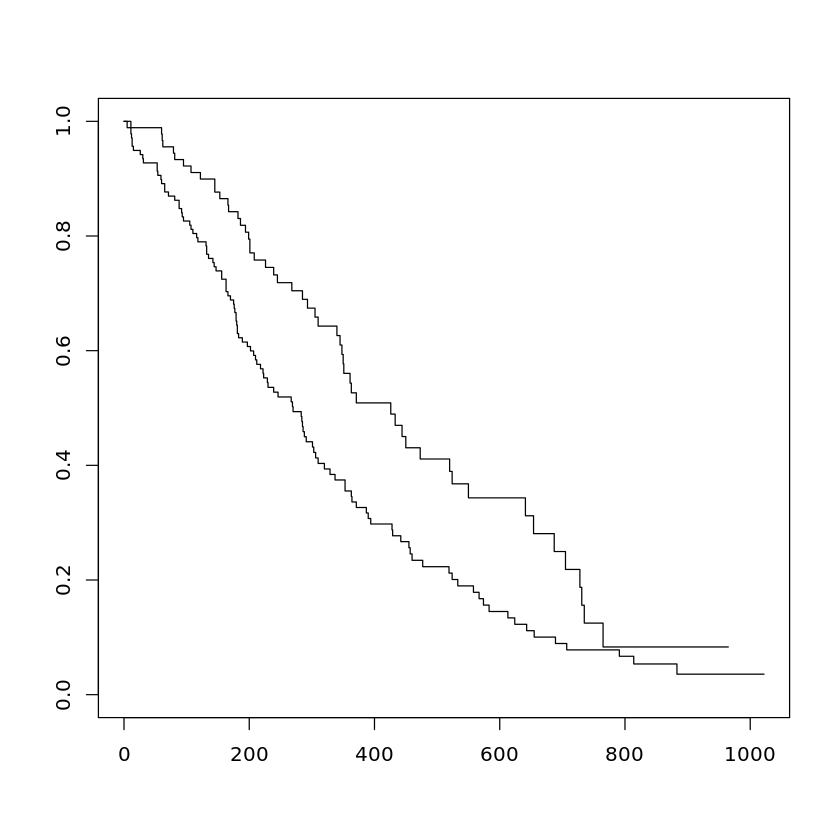

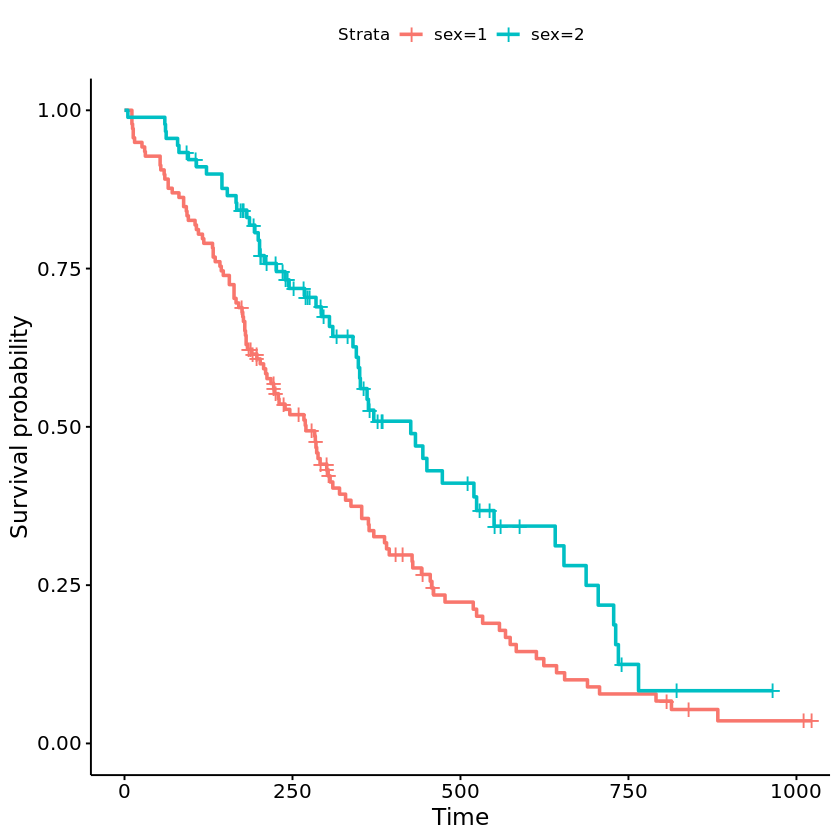

In [8]:
sfit <- survfit(Surv(time, status)~sex, data=lung)
plot(sfit)

library(survminer)
ggsurvplot(sfit)